### Derin Öğrenme - Uygulamalar

#### Tek Perceptron

In [1]:
%load_ext watermark

In [2]:
%watermark -a "E. Kaan Ulgen" -p numpy,scipy,matplotlib,pandas,scikit-learn

E. Kaan Ulgen 

numpy 1.19.5
scipy 1.5.4
matplotlib 3.1.0
pandas 1.2.2
sklearn 0.23.2


In [3]:
import numpy as np

In [4]:
girdi = [1.0, 2, 3.0, 2.2]
agırlık = [0.5, 0.3, -0.5, 1.0]
bias = 2.2

In [5]:
cıktı = np.dot(agırlık, girdi) + bias
cıktı

4.0

#### Detay

np.dot(agırlık, girdi) + bias = (0.5x1.0 + 0.3x2 + -0.5x3.0 + 1.0x2.2) + 2.2

In [6]:
cıktı

4.0

#### Nöron Katmanı (Tek Katmanlı Perceptron)

- Diyelim ki elimizde 3 tane nörondan oluşan bir katman var.

In [7]:
girdi = [1.0, 2, 3.0, 2.2]

agırlık = [[0.5, 0.3, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.3, 0.1, -0.27, 0.7]]

bias = [2.2, 2.0, 1.5] 

In [8]:
katman_sonucu = np.dot(agırlık, girdi) + bias
katman_sonucu

array([4.  , 0.36, 2.13])

#### Detay

np.dot(agırlık, girdi) = [(np.dot(agırlık[0], girdi),
                          (np.dot(agırlık[1], girdi),
                          (np.dot(agırlık[2], girdi)] = [1.8, -1.46, 0.63]
                          
np.dot(agırlık, girdi) + bias = [1.8, -1.46, 0.63] + [2.2, 2.0, 1.5] =  [4.0, 0.36, 2.13]                        

#### Yığın Kavramı - Batch Size

- Derin öğrenme modelleri tüm verileri bir kere de kullanmak yerine, küçük yığınlara ayırır. Örneğin büyüklüğü 64 olan bir veri yığını düşünelim.

<center>yıgın = egitim_verisi[:64]</center>

- Daha sonraki yığın:

<center>yıgın = egitim_verisi[64:128]</center>

- n'inci yığın:

<center>yıgın = egitim_verisi[64 * n: 64 * (n+1)]</center>

In [9]:
girdi = [[1.0, 2, 3.0, 2.2],
        [3.0, 1.0, 2.0, -1.0],
        [2.0, -1.5, -2.7, 1.2]]

agırlık = [[0.5, 0.3, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.3, 0.1, -0.27, 0.7]]

bias = [2.2, 2.0, 1.5] 

In [10]:
katman_sonucu = np.dot(girdi, np.array(agırlık).T) + bias
katman_sonucu

array([[ 4.   ,  0.36 ,  2.13 ],
       [ 2.   ,  3.61 , -0.54 ],
       [ 5.3  ,  3.063,  2.319]])

#### Katman Ekleme

In [11]:
girdi = [[1.0, 2, 3.0, 2.2],
        [3.0, 1.0, 2.0, -1.0],
        [2.0, -1.5, -2.7, 1.2]]

agırlık = [[0.5, 0.3, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.3, 0.1, -0.27, 0.7]]

bias = [2.2, 2.0, 1.5] 

- 2. katman için:

In [12]:
agırlık2 = [[0.8, -0.2, -0.12],
           [-0.5, 0.91, 0.26],
           [-0.3, 0.14, -0.15]]

bias2 = [-1, 2.0, 1.] 

In [13]:
katman1_sonuc = np.dot(girdi, np.array(agırlık).T) + bias
katman1_sonuc

array([[ 4.   ,  0.36 ,  2.13 ],
       [ 2.   ,  3.61 , -0.54 ],
       [ 5.3  ,  3.063,  2.319]])

In [14]:
katman2_sonuc = np.dot(katman1_sonuc, np.array(agırlık2).T) + bias2
katman2_sonuc

array([[ 1.8724 ,  0.8814 , -0.4691 ],
       [-0.0572 ,  4.1447 ,  0.9864 ],
       [ 2.34912,  2.74027, -0.50903]])

### Perceptron Uygulama-2

In [15]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100,
                       centers=2,
                       cluster_std=0.60,
                       random_state=0)

In [16]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

No handles with labels found to put in legend.


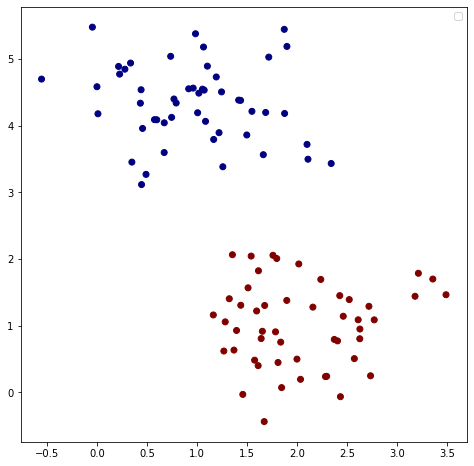

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.jet)
plt.legend()
plt.show()

In [18]:
y.shape[0]

100

#### Eğitim - Test Verisi

In [19]:
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalizasyon
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

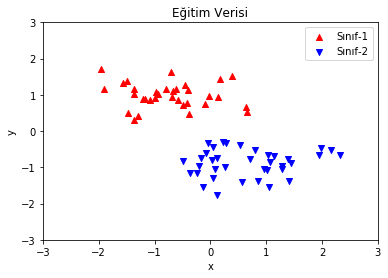

In [20]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='Sınıf-1', marker='^', c="r")
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='Sınıf-2', marker='v', c="b")
plt.title('Eğitim Verisi')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

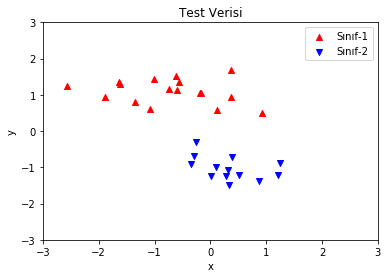

In [21]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='Sınıf-1', marker='^', c="r")
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='Sınıf-2', marker='v', c="b")
plt.title('Test Verisi')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [22]:
np.zeros((2,1), dtype=np.float)

array([[0.],
       [0.]])

In [23]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [24]:
model = Perceptron(num_features=2)

model.train(X_train, y_train, epochs=5)

print('Model parametreleri:\n')
print('  Ağırlıklar: %s\n' % model.weights)
print('  Bias: %s\n' % model.bias)

Model parametreleri:

  Ağırlıklar: [[ 1.14182036]
 [-2.05991215]]

  Bias: [0.]



In [25]:
test_acc = model.evaluate(X_test, y_test)
print('Test Verisinin Doğruluğu: %.2f%%' % (test_acc*100))

Test Verisinin Doğruluğu: 96.67%


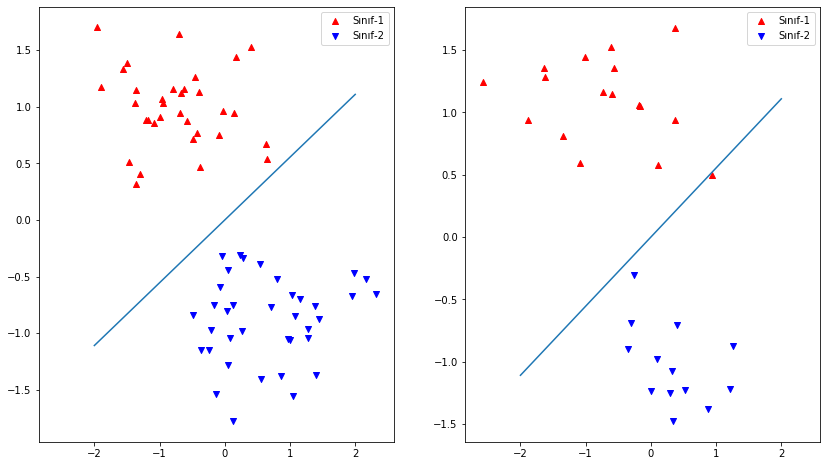

In [26]:
w, b = model.weights, model.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(14,8))

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label="Sınıf-1", marker="^", c="r")
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label="Sınıf-2", marker="v", c="b")
ax[0].plot([x_min, x_max], [y_min, y_max])
ax[0].legend(loc='best')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label="Sınıf-1", marker="^", c="r")
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label="Sınıf-2", marker="v", c="b")
ax[1].plot([x_min, x_max], [y_min, y_max])


ax[1].legend(loc='best')
plt.show()

## Keras ile Derin Öğrenme

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [28]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [29]:
print(train_images.shape)

(60000, 28, 28)


In [30]:
print(test_images.shape)

(10000, 28, 28)


In [31]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

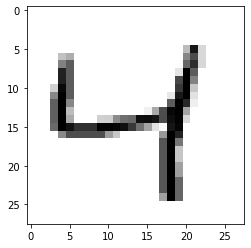

In [32]:
digit = train_images[2]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### Sinir Ağının Oluşturulması - Ağın İnşa Edilmesi

- Derin ağların temel yapıtaşı, katmanlardır. 
- Veri, katmana girdikten sonra daha anlamlı bir formda çıkar. Yani katmanlar, kendisini besleyen verilerden problemin çözümüne ışık tutacak şekilde daha kullanışlı, anlamlı gösterimler çıkarmaya çalışır. Hedef ve amaç bu olsada her zaman anlamlı sonuçlar elde edilemiyor.

In [33]:
from keras import models
from keras import layers

# Model oluşturuluyor
model = models.Sequential() 

# Modele iki gizli katman ekliyoruz. Katmandaların 1.sinde 512 2.sinde ise 32 düğüm var ve her ikisinde "relu" aktivasyon fonksiyonunu kullanıyor. 
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dense(32, activation='relu'))

# Modelimizin ezberlemesini önlemek için Dropout katmanını kullanıyoruz. 
# Dropout katmanı her adımda belirtilen orandaki girdiyi rassal olarak sıfıra eşitleyerek modelin veriye aşırı uyum sağlamasının önüne geçer.
# Dropout değeri 0 ile 1 arasındadır.
model.add(layers.Dropout(0.5))

# Son eklediğimiz katman ise çıktı katmanıdır. Çoklu sınıflandırma problemi üzerine çalıştığımız için "softmax" aktivasyon fonksiyonunu kullanıyoruz.
model.add(layers.Dense(10, activation='softmax'))

**Ağımızı eğitmeden önce 3 önemli kısım mevcut:**

- Kayıp Fonksiyonu (Loss Function)
- Eniyileme (Optimizer) Algoritması
- Metrik

In [34]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [35]:
train_images.shape, train_images.dtype

((60000, 28, 28), dtype('uint8'))

- Eğitim veri setimizde (60000, 28, 28) şeklinde bir dizide, unit8 veri tipine sahip her elaman 0-255 arasında değerler almaktadır. Eğitim veri setini float32 veri tipinde 0 ile 1 arasında olacak şekilde düzenliyoruz.

In [36]:
train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype("float32") / 255

- Etiketleri vektöre dönüştürürken tam sayı listesi kullanıyoruz.

In [37]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- Model eğitilirken verilerin tamamı aynı anda eğitime katılmaz. Belli sayıda parçalar halinde eğitimde yer alırlar. “Batch_size” (Mini-yığın), kabaca bir seferde yapay sinir ağını eğitmek için kullanılacak örnek sayısını belirtir. “Epoch” (epok, devir) ise bütün veri kümesinin yapay sinir ağından bir kere geçmesi olarak tanımlanmaktadır.

In [38]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.8219 - accuracy: 0.7344
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2646 - accuracy: 0.9256
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1921 - accuracy: 0.9461
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1565 - accuracy: 0.9567
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1270 - accuracy: 0.9626


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rounded_predictions = model.predict_classes(test_images, batch_size=128, verbose=0)


rounded_labels=np.argmax(test_labels, axis=1)

cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

W0104 11:20:03.727645 4676015552 sequential.py:447] `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[ 971,    1,    0,    1,    0,    2,    2,    1,    1,    1],
       [   0, 1126,    3,    1,    0,    1,    1,    0,    3,    0],
       [   5,    2, 1001,    3,    2,    1,    3,    7,    7,    1],
       [   0,    0,    3,  989,    0,    6,    0,    4,    3,    5],
       [   1,    0,    3,    0,  947,    0,    5,    0,    0,   26],
       [   2,    0,    0,    4,    0,  875,    5,    1,    2,    3],
       [   8,    3,    0,    0,    4,    6,  936,    0,    1,    0],
       [   2,    9,    9,    4,    0,    0,    0,  985,    1,   18],
       [   3,    2,    3,    5,    4,    6,    2,    2,  938,    9],
       [   4,    2,    0,    5,    4,    2,    0,    3,    2,  987]])

In [14]:
print(classification_report(rounded_labels, rounded_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

